In [1]:
from tools.base import *
from tools.ddmtd import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import sleep 
from copy import deepcopy
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
matplotlib.style.available
# matplotlib.style.use(['seaborn-darkgrid'])
# plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 100

In [3]:
#Generate column names
NUM_WORDS = 32
column_names = []
for i in range(1,NUM_WORDS+1):
    column_names.append(f"edge{i}")
    column_names.append(f"ddmtd{i}")
    
# pd.set_option('max_columns', None)
# pd.set_option('max_rows', 100)

In [4]:
def data2df(data_folder="./data_files"):
    dv1= pd.read_csv(f"{data_folder}/ddmtd1.txt",sep=",",header=0 ,skiprows=0,names=column_names[0:16])
    dv2= pd.read_csv(f"{data_folder}/ddmtd2.txt",sep=",",header=0 ,skiprows=0,names=column_names[16:32])
    dv3= pd.read_csv(f"{data_folder}/ddmtd3.txt",sep=",",header=0 ,skiprows=0,names=column_names[32:48])
    dv = pd.concat((dv1,dv2,dv3),axis=1)  
    df = deepcopy(dv)
    return df 

def get_ddmtd_obj(df,freq=160*10**6, data_stream = (1,3)):
    data = ddmtd(deepcopy(df),q=1,channel=data_stream)
    data.N=100_000
    data.INPUT_FREQ = freq
    data.Recalc()
    return data

In [7]:
!./run_atKria.sh #run once for setup

Copying Data_acq Folder
Running & Compiling Section
Compiling get_data_bram
get_data_bram compiled
Running get_data_bram
remove from slot 0 returns: 0 (Ok)
bram: loaded to slot 0
Firmware Version: 3.0 
 

In [13]:
# need to change permissions to write to microcontroller FIXME
# sudo chmod 666 /dev/ttyACM0
# Will want to find a more secure solution
# for i in range(40):
#     !./get_data_kria.sh {i}
#     !./shift_5ms.sh
#     sleep(0.3)
# !./get_data_kria.sh 7
# !./shift_5ms.sh
!./get_data_kria.sh 2

Running get_data_bram
Firmware Version: 3.0 
 /home/tom/Documents/rtm_prod/rtm_ddmtd_kria/acq_software


True
True
True


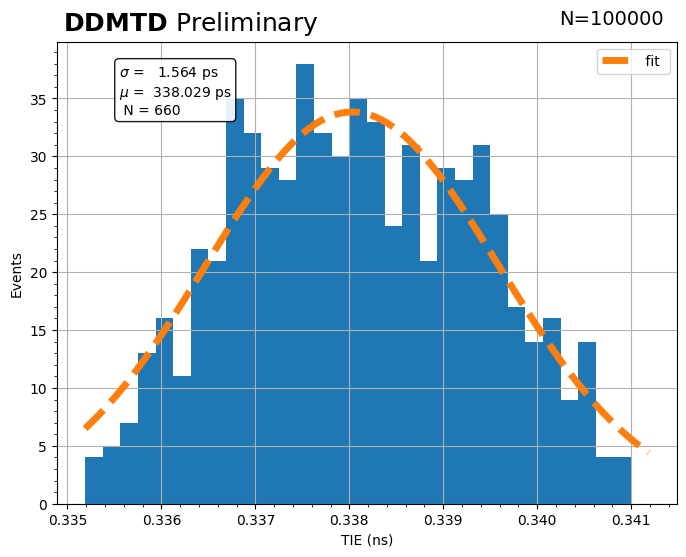

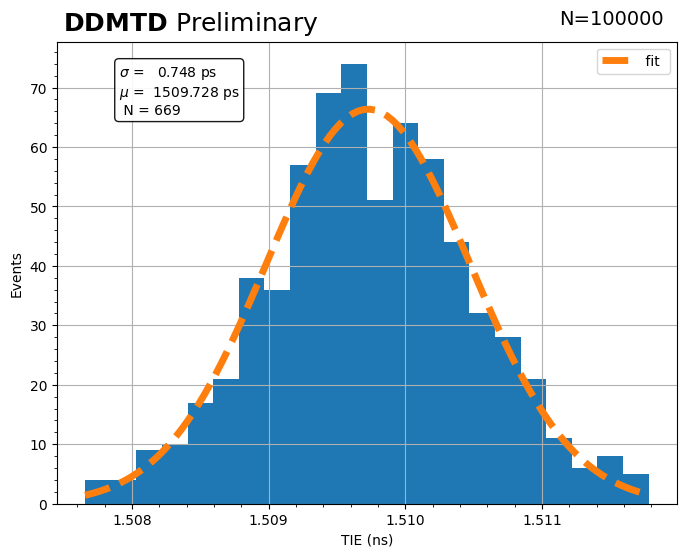

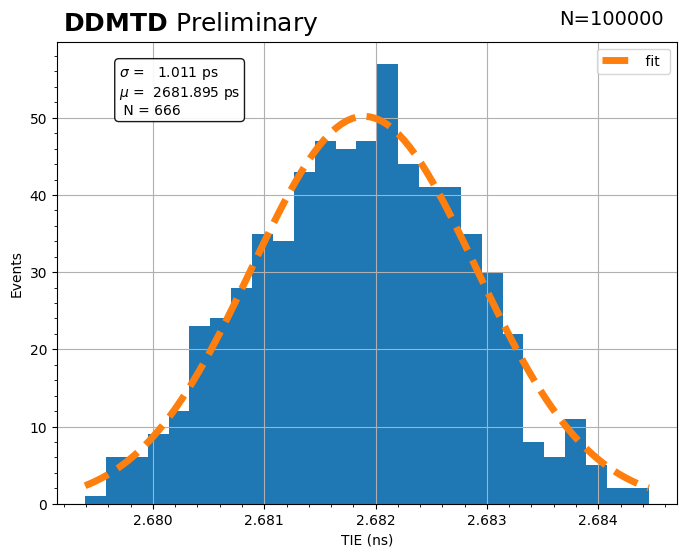

In [17]:

def phase(i, qn):
    return get_ddmtd_obj(data2df(data_folder=f"./data_files/{i}"),data_stream = (1,qn)).drawTIE(fit=True,draw=True)

q1 = []
q2 = []
q3 = []
q4 = []
for i in range(3):
    temp,_ = phase(i,2)
    q1.append(temp[1])
    # temp,_ = phase(i,3)
    # q2.append(temp[1])
    # temp,_ = phase(i,4)
    # q3.append(temp[1])
    # temp,_ = phase(i,5)
    # q4.append(temp[1])
    


# print(q1,q2,q3,q4)

# print(get_ddmtd_obj(df2,data_stream = (1,2)).drawTIE(fit=True))

# get_ddmtd_obj(df,data_stream = (1,3)).drawTIE(fit=True)
# get_ddmtd_obj(df,data_stream = (1,4)).drawTIE(fit=True)
# get_ddmtd_obj(df,data_stream = (1,5)).drawTIE(fit=True)

# get_ddmtd_obj(df2,data_stream = (1,3)).drawTIE(fit=True)
# get_ddmtd_obj(df2,data_stream = (1,4)).drawTIE(fit=True)
# get_ddmtd_obj(df2,data_stream = (1,5)).drawTIE(fit=True)


# plt.scatter(range(ddmtd1.TIE_fall.size),ddmtd1.TIE_fall)
# ddmtd1.drawTIE(fit=True,draw=True)
# ddmtd2.drawTIE(fit=True,draw=True)
# ddmtd3.drawTIE(fit=True,draw=True)
# ddmtd4.drawTIE(fit=True,draw=True)

In [15]:
print(q1)

[0.3380294862388416, 1.5097278669010872, 2.6818951378091405]


In [16]:
np.savetxt("shiftQ1", q1, delimiter=",")
np.savetxt("shiftQ2", q2, delimiter=",")
np.savetxt("shiftQ3", q3, delimiter=",")
np.savetxt("shiftQ4", q4, delimiter=",")

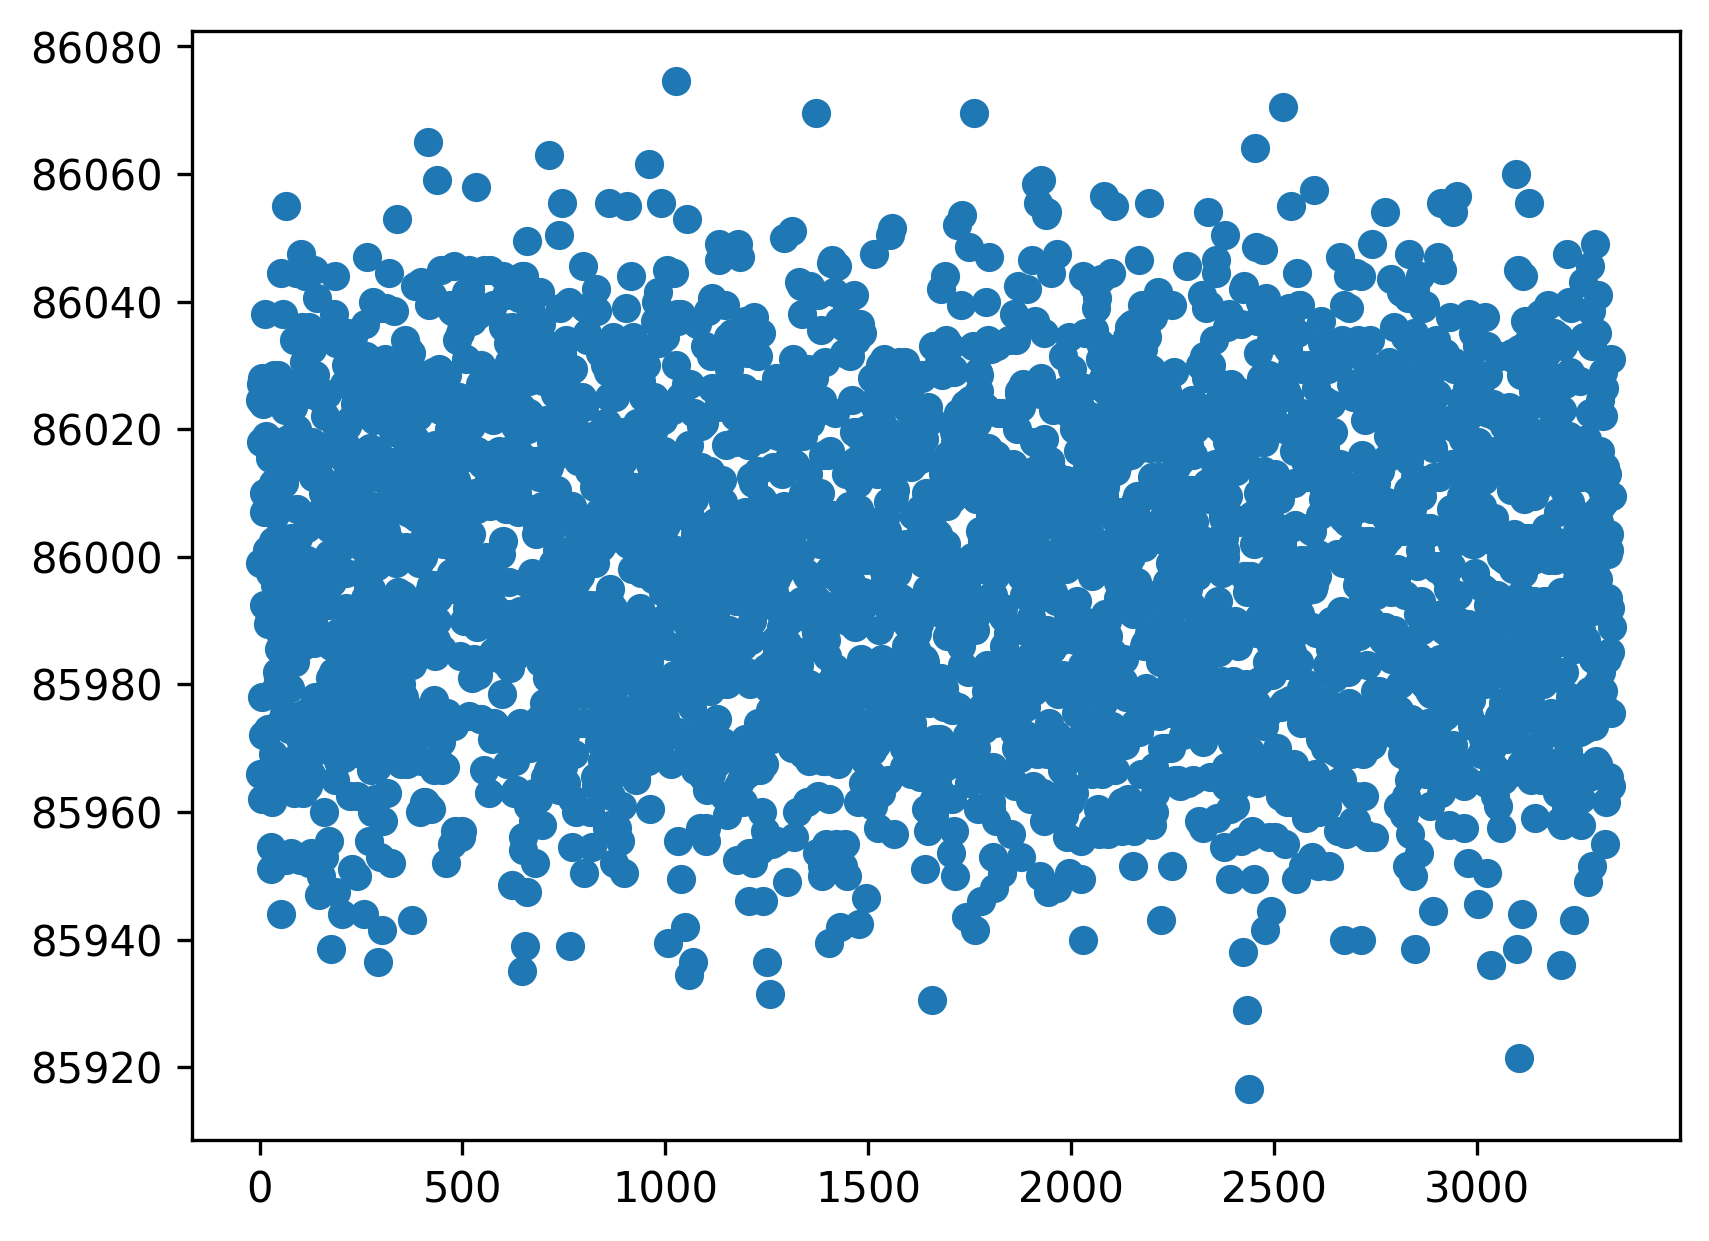

In [7]:
plt.scatter(range(ddmtd1.TIE_fall.size),ddmtd1.TIE_fall)